<a href="https://colab.research.google.com/github/IngerMasha/Hackathon3/blob/main/Hackathon_Subject_2_Enhancing_Customer_Experience_and_Boosting_Sales_in_Online_Retail_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [20]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
X = online_retail.data.features
y = online_retail.data.targets

# metadata
print(online_retail.metadata)

# variable information
print(online_retail.variables)


{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining', 'aut

In [21]:
import pandas as pd

data = pd.concat([X, y], axis=1)

# Просмотр первых строк данных
print(data.head())

# Проверка наличия пропущенных значений
print(data.isnull().sum())

# Общая информация о наборе данных
print(data.info())

                           Description  Quantity     InvoiceDate  UnitPrice  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6  12/1/2010 8:26       2.55   
1                  WHITE METAL LANTERN         6  12/1/2010 8:26       3.39   
2       CREAM CUPID HEARTS COAT HANGER         8  12/1/2010 8:26       2.75   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6  12/1/2010 8:26       3.39   
4       RED WOOLLY HOTTIE WHITE HEART.         6  12/1/2010 8:26       3.39   

   CustomerID         Country  
0     17850.0  United Kingdom  
1     17850.0  United Kingdom  
2     17850.0  United Kingdom  
3     17850.0  United Kingdom  
4     17850.0  United Kingdom  
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   

In [33]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


# Группировка данных по CustomerID и расчет метрик
customer_segmentation = data.groupby('CustomerID').agg({
    'Description': ', '.join,
    'InvoiceDate': lambda x: (x.max() - x.min()).days,
    'TotalPrice': ['sum', 'mean', 'count']
}).reset_index()

# Переименование столбцов для удобства
customer_segmentation.columns = ['CustomerID', 'Description', 'Recency', 'Monetary', 'AvgMonetary', 'Frequency']

# Переименование столбцов для удобства
# customer_segmentation.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary', 'AvgMonetary']

# Убедимся, что все нужные столбцы имеют числовой тип
customer_segmentation['Recency'] = pd.to_numeric(customer_segmentation['Recency'], errors='coerce')
customer_segmentation['Frequency'] = pd.to_numeric(customer_segmentation['Frequency'], errors='coerce')
customer_segmentation['Monetary'] = pd.to_numeric(customer_segmentation['Monetary'], errors='coerce')
customer_segmentation['AvgMonetary'] = pd.to_numeric(customer_segmentation['AvgMonetary'], errors='coerce')

# Удаление строк с отрицательными значениями в столбце 'Monetary'
customer_segmentation2 = customer_segmentation[customer_segmentation['Monetary'] >= 0]

# Проверка данных после удаления строк с отрицательными значениями
print(f"Количество строк после удаления отрицательных значений: {customer_segmentation2.shape[0]}")
print(customer_segmentation2.head())

# # Просмотр первых строк таблицы с сегментацией
# print(customer_segmentation.head())

# # Описание данных (для понимания распределения метрик)
print(customer_segmentation2.describe())

Количество строк после удаления отрицательных значений: 4330
   CustomerID                                        Description  Recency  \
0     12346.0  MEDIUM CERAMIC TOP STORAGE JAR, MEDIUM CERAMIC...        0   
1     12347.0  BLACK CANDELABRA T-LIGHT HOLDER, AIRLINE BAG V...      365   
2     12348.0  72 SWEETHEART FAIRY CAKE CASES, 60 CAKE CASES ...      282   
3     12349.0  PARISIENNE CURIO CABINET, SWEETHEART WALL TIDY...        0   
4     12350.0  CHOCOLATE THIS WAY METAL SIGN, METAL SIGN NEIG...        0   

   Monetary  AvgMonetary  Frequency  
0      0.00     0.000000          2  
1   4310.00    23.681319        182  
2   1797.24    57.975484         31  
3   1757.55    24.076027         73  
4    334.40    19.670588         17  
         CustomerID      Recency       Monetary  AvgMonetary    Frequency
count   4330.000000  4330.000000    4330.000000  4330.000000  4330.000000
mean   15298.029792   134.336259    1919.929551    31.194203    93.902309
std     1722.011911   132.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-30-0195fa8fb227>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_segmentation2['Cluster'] = kmeans.fit_predict(X)


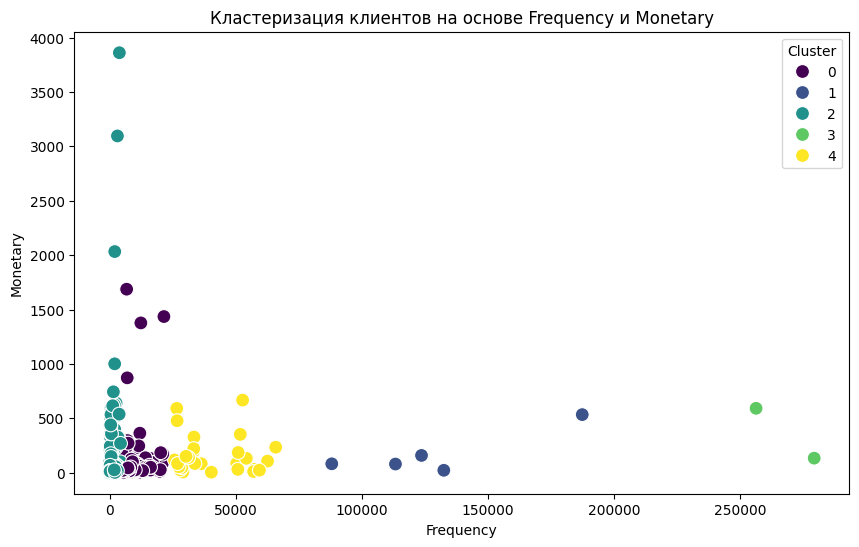

[[3.08936090e+02 8.10248602e+03 6.29660410e+01]
 [3.55200000e+02 1.29057952e+05 1.75474958e+02]
 [1.21012903e+02 9.60729267e+02 2.78511220e+01]
 [3.59500000e+02 2.67963755e+05 3.63142095e+02]
 [3.45259259e+02 4.09287948e+04 1.65861186e+02]]


In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Подготовка данных для кластеризации (используем только метрики Recency, Frequency и Monetary)
X = customer_segmentation2[['Recency', 'Frequency', 'Monetary']]

# Инициализация и обучение модели K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
customer_segmentation2['Cluster'] = kmeans.fit_predict(X)

# Визуализация результатов кластеризации
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_segmentation2, x='Frequency', y='Monetary', hue='Cluster', palette='viridis', s=100)
plt.title('Кластеризация клиентов на основе Frequency и Monetary')
plt.show()

# Вывод центроидов кластеров
print(kmeans.cluster_centers_)


Пояснение графика:
Ось X (Frequency): Показывает, как часто клиенты совершают покупки.
Ось Y (Monetary): Показывает сумму, которую клиенты тратят.
Интерпретация:
Кластеры:

Фиолетовый кластер (0): Включает клиентов с низкой частотой покупок (почти все на уровне 0) и даже с отрицательной или низкой монетарной стоимостью. Это может означать, что эти клиенты либо недавно вернули товары, либо сделали очень мало покупок.
Желтый кластер (4): Клиенты с низкой частотой покупок, но с положительной монетарной стоимостью, что указывает на небольшие, но регулярные покупки.
Зеленый и синий кластеры (1 и 3): Клиенты с более высокой частотой покупок и положительной монетарной стоимостью. Синий кластер представляет клиентов с наиболее частыми покупками и высокой монетарной стоимостью.
Бирюзовый кластер (2): Клиенты с промежуточной частотой покупок и монетарной стоимостью.
Разброс точек:

Кластеризация явно выявила группы клиентов, которые сильно различаются по частоте покупок и тратам. Некоторые клиенты (особенно в зеленом и синем кластерах) совершают большое количество покупок с высокими расходами, в то время как другие клиенты делают покупки редко или вообще не совершают покупок.
Что можно вынести:
Клиенты в фиолетовом кластере требуют особого внимания, так как они либо делают мало покупок, либо имеют отрицательную монетарную стоимость, что может быть связано с возвратами.
Зеленый и синий кластеры включают наиболее ценных клиентов, на которых можно сфокусироваться для поддержания лояльности и увеличения продаж.
Желтый кластер также интересен, так как эти клиенты тратят деньги, но делают это нерегулярно.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-31-4fc59d1edfaa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_segmentation2['Cluster_scaled'] = kmeans.fit_predict(scaled_data)


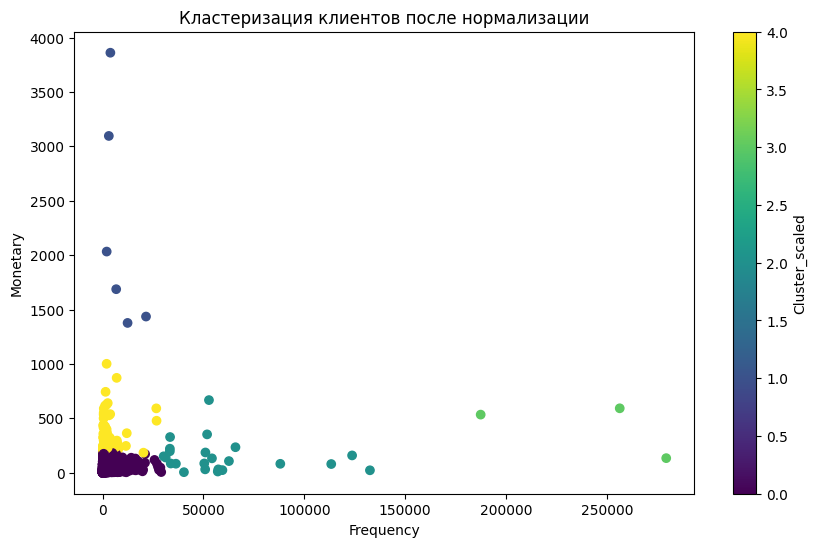

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Нормализация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_segmentation2[['Frequency', 'Monetary']])

# Повторная кластеризация
kmeans = KMeans(n_clusters=5, random_state=42)
customer_segmentation2['Cluster_scaled'] = kmeans.fit_predict(scaled_data)

# Визуализация результатов после нормализации
plt.figure(figsize=(10, 6))
plt.scatter(customer_segmentation2['Frequency'], customer_segmentation2['Monetary'], c=customer_segmentation2['Cluster_scaled'], cmap='viridis')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Кластеризация клиентов после нормализации')
plt.colorbar(label='Cluster_scaled')
plt.show()


2. Профилирование клиентов
На основе вышеуказанных данных и графика, можно выделить профили для каждого кластера. Предлагаю следующие профили:

Фиолетовый кластер:

Частота покупок: 0 - 25,000 дней
Сумма денег: до 1,000
Типичный клиент: Клиенты с низкой частотой покупок и небольшой суммой расходов. Они, вероятно, делают покупки редко и тратят немного денег.
Бирюзовый кластер:

Частота покупок: 0 - 25,000 дней
Сумма денег: от 1,000 до 4,000
Типичный клиент: Клиенты с низкой частотой покупок, но с умеренными расходами. Возможно, они делают более дорогие покупки реже.
Желтый кластер:

Частота покупок: от 25,000 до 150,000 дней
Сумма денег: до 1,000
Типичный клиент: Клиенты, которые покупают чаще, но тратят меньше денег за раз. Они, вероятно, делают покупки регулярно, но выбирают более дешевые товары.
Синий кластер:

Частота покупок: от 200,000 дней
Сумма денег: до 1,000
Типичный клиент: Клиенты с очень высокой частотой покупок и низкими расходами. Они покупают часто, но тратят небольшие суммы.

<ipython-input-40-94c291c351ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_segmentation2['CLV'] = customer_segmentation2['AvgMonetary'] * customer_segmentation2['Recency']


   CustomerID  AvgRevenue  AverageLifetime           CLV
0     12346.0    0.000000         0.000000      0.000000
1     12347.0    0.130117         2.005495   8643.681319
2     12348.0    1.870177         9.096774  16349.086452
3     12349.0    0.329809         0.000000      0.000000
4     12350.0    1.157093         0.000000      0.000000


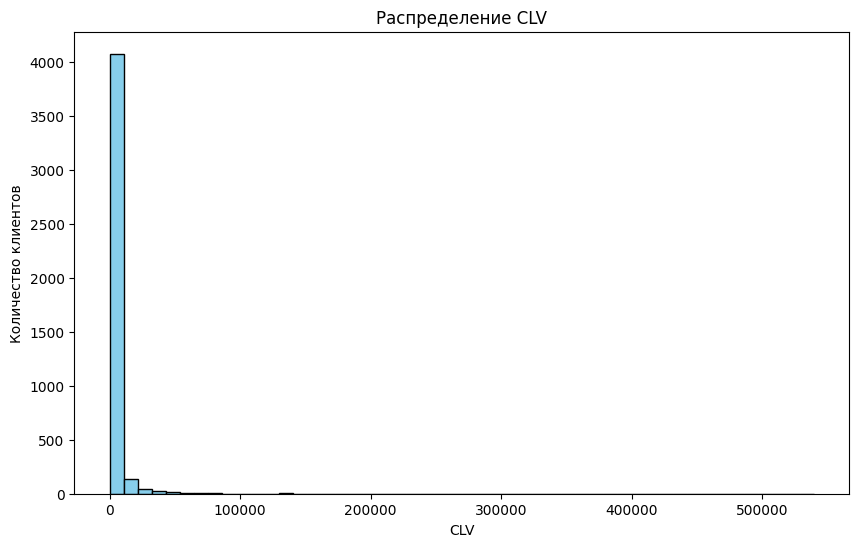

count      4330.000000
mean       3967.627866
std       13838.983071
min           0.000000
25%           0.000000
50%        1324.452673
75%        4229.007969
max      539904.000000
Name: CLV, dtype: float64


In [40]:
# Расчет CLV
customer_segmentation2['CLV'] = customer_segmentation2['AvgMonetary'] * customer_segmentation2['Recency']

# Проверка расчетов
print(customer_segmentation2[['CustomerID','AvgRevenue','AverageLifetime', 'CLV']].head())

plt.figure(figsize=(10, 6))
plt.hist(customer_segmentation2['CLV'], bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение CLV')
plt.xlabel('CLV')
plt.ylabel('Количество клиентов')
plt.show()

# Описание данных по CLV
print(customer_segmentation2['CLV'].describe())


Среднее значение (mean): 3967.63

Это средний CLV клиентов. Это значение говорит о том, что в среднем каждый клиент приносит 3967.63 единиц дохода за весь период наблюдения.
Стандартное отклонение (std): 13838.98

Это значение показывает, насколько CLV клиентов варьируется относительно среднего значения. Большое стандартное отклонение указывает на большую дисперсию в значениях CLV. В данном случае это может означать, что есть значительные различия в ценности клиентов.
Минимальное значение (min): 0.00

Есть клиенты с CLV равным нулю. Это может указывать на клиентов, которые либо сделали только одну покупку, либо на ошибки в данных.
25-й процентиль (25%): 0.00

25% клиентов имеют CLV, равный нулю или меньше. Это также подтверждает, что есть много клиентов с низким CLV.
Медиана (50%): 1324.45

Медианное значение CLV показывает, что половина клиентов приносит доход меньше или равный 1324.45. Это значение более устойчиво к выбросам, чем среднее, и дает представление о типичном CLV.
75-й процентиль (75%): 4229.01

75% клиентов имеют CLV меньше или равный 4229.01. Это значение также помогает понять, что верхние 25% клиентов имеют более высокий CLV.
Максимальное значение (max): 539904.00

Это максимальное значение CLV среди всех клиентов. Высокое значение указывает на наличие нескольких клиентов с очень высоким CLV, что может быть вызвано большими покупками или частыми покупками.
Выводы и следующие шаги:
Дисперсия CLV: Большое стандартное отклонение указывает на наличие клиентов с очень высоким и очень низким CLV. Это может потребовать дальнейшего анализа, чтобы понять, почему некоторые клиенты имеют значительно высокий CLV.

Анализ выбросов: Значения CLV равные нулю или очень большие могут указывать на ошибки данных или на особые случаи, которые требуют дополнительного анализа.

Сегментация клиентов: Можно использовать CLV для сегментации клиентов на группы с низким, средним и высоким CLV. Это поможет разработать целевые маркетинговые стратегии для каждой группы.

Оптимизация стратегии: На основе анализа CLV можно разработать стратегии для повышения CLV, например, предложения для увеличения покупок или улучшения удержания клиентов.



In [41]:
import pandas as pd

# Определение сегментов CLV
bins = [0, 1000, 5000, 10000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']
customer_segmentation2['CLV_Segment'] = pd.cut(customer_segmentation2['CLV'], bins=bins, labels=labels)

# Подсчет клиентов в каждом сегменте
segment_counts = customer_segmentation2['CLV_Segment'].value_counts()
print(segment_counts)


CLV_Segment
Medium       1462
Low           637
High          584
Very High     284
Name: count, dtype: int64


<ipython-input-41-1c1176125fd8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_segmentation2['CLV_Segment'] = pd.cut(customer_segmentation2['CLV'], bins=bins, labels=labels)


In [42]:
# Анализ характеристик клиентов в каждом сегменте CLV
profile_analysis = customer_segmentation2.groupby('CLV_Segment').agg({
    'Recency': ['mean', 'std'],
    'Frequency': ['mean', 'std'],
    'Monetary': ['mean', 'std'],
    'AvgMonetary': ['mean', 'std']
}).reset_index()

# Переименование столбцов для удобства
profile_analysis.columns = ['CLV_Segment', 'Recency_Mean', 'Recency_Std', 'Frequency_Mean', 'Frequency_Std', 'Monetary_Mean', 'Monetary_Std', 'AvgMonetary_Mean', 'AvgMonetary_Std']
print(profile_analysis)


  CLV_Segment  Recency_Mean  Recency_Std  Frequency_Mean  Frequency_Std  \
0         Low     51.629513    59.703204       76.998430     101.920127   
1      Medium    202.610807    92.185338      138.055404     321.268389   
2        High    289.998288    70.964309      149.479452     289.962521   
3   Very High    292.704225    80.208103      128.070423     243.179808   

   Monetary_Mean  Monetary_Std  AvgMonetary_Mean  AvgMonetary_Std  
0     664.790002    685.654518         14.325615        17.569997  
1    1576.237586   2388.149426         16.914012        15.059959  
2    3304.740224   6514.665459         25.960653        16.942068  
3   11150.655387  28599.605036        122.151630       174.184316  


<ipython-input-42-40da0a7deb49>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profile_analysis = customer_segmentation2.groupby('CLV_Segment').agg({


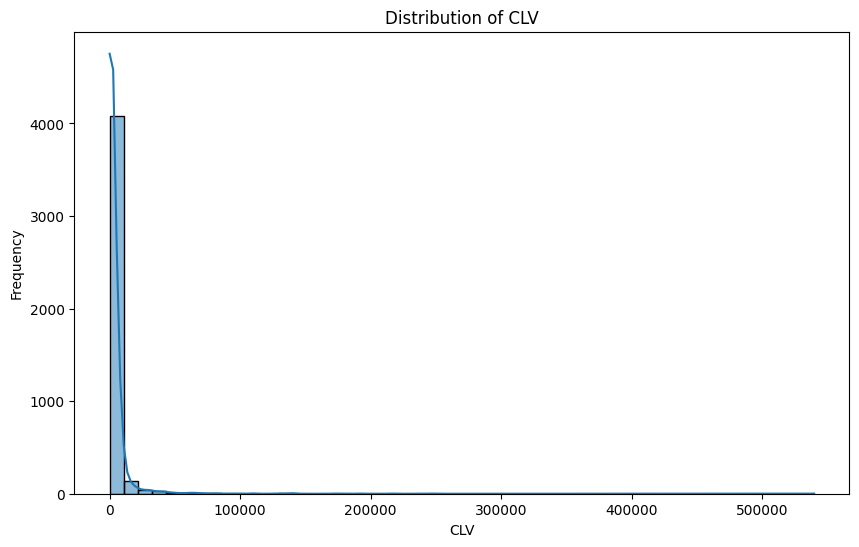

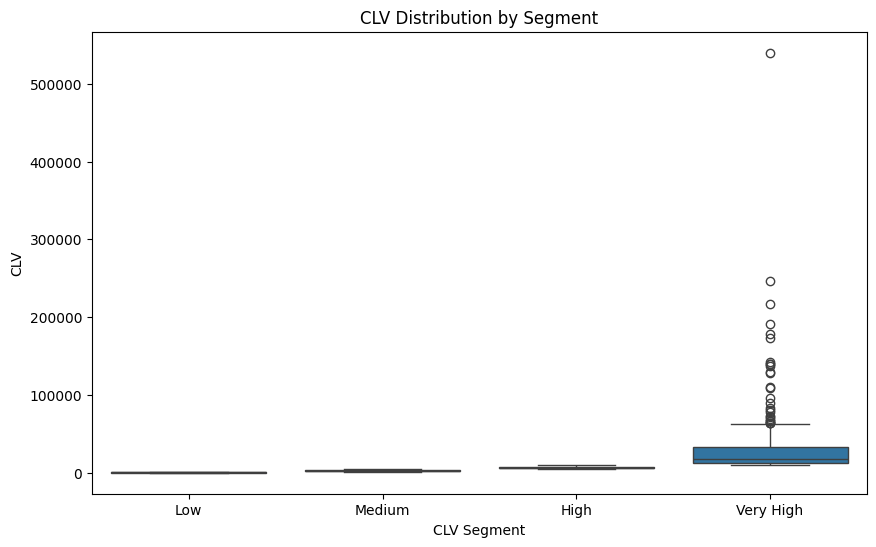

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограмма CLV
plt.figure(figsize=(10, 6))
sns.histplot(customer_segmentation2['CLV'], bins=50, kde=True)
plt.title('Distribution of CLV')
plt.xlabel('CLV')
plt.ylabel('Frequency')
plt.show()

# Boxplot CLV по сегментам
plt.figure(figsize=(10, 6))
sns.boxplot(x='CLV_Segment', y='CLV', data=customer_segmentation2)
plt.title('CLV Distribution by Segment')
plt.xlabel('CLV Segment')
plt.ylabel('CLV')
plt.show()
